In [6]:
"""
calcule la reflectance et transmittance du systeme
n0(ambiant)/n1/n2...n1/n2/n3(substrat)/n0(ambiant) 
reste a faire: ne marche pas pour des n complexes mais devrait
"""

'\ncalcule la reflectance et transmittance du systeme\nn0(ambiant)/n1/n2...n1/n2/n3(substrat)/n0(ambiant) \nreste a faire: ne marche pas pour des n complexes mais devrait\n'

In [7]:
import numpy as np
import filtre_et_miroir as flt                                                                    
import matplotlib.pyplot as plt

In [8]:
lambdatemp = 800e-9 #longeur d'onde avec Max de réf.
theta0 = 0 #angle d'incidence
pol = 1 #1=s  2=p
n0 = 1.0 #milieu ambiant
n1 = 1.5 + 0.0*1j #couche 1 aucune absorption initial
n2 = 1.7 + 0.0*1j #couche 2 aucune absorption initial
n3 = 1.5 #substrat

#epaisseur du bi-couche (empilement quart-d'onde)
d1 = lambdatemp/(4*n1)
d2 = d1*n1/n2

N = 20 # Nombre de bi-couches

lambdamin = 400e-9
lambdamax = 1000e-9
Np = 200 # Nombre de point
deltalambda = (lambdamax-lambdamin)/Np
longeurdonde = lambdamin

In [9]:
x = np.zeros(shape=(Np, 1))
y1 = np.zeros(shape=(Np, 1))
y2 = np.zeros(shape=(Np, 1))
y3 = np.zeros(shape=(Np, 1))

j = 0

while longeurdonde <= lambdamax:

    #bi-couche
    P1 = flt.P(n1,d1,n0,theta0,longeurdonde)
    P2 = flt.P(n2,d2,n0,theta0,longeurdonde)
    T1 = flt.T(pol,n1,n2,n0,theta0)
    T2 = flt.T(pol,n2,n1,n0,theta0)
    C = P1@T1@P2@T2 #cellule unitaire

    #couplage ambiant et substrat
    T01 = flt.T(pol,n0,n1,n0,theta0)
    T2S = flt.T(pol,n2,n3,n0,theta0)
    TS0 = flt.T(pol,n3,n0,n0,theta0)

    #derniere bi-couche (pour interface n2/n3)
    D = P1@T1@P2@T2S

    #substrat fini
    S = T01@(C**(N-1))@D@TS0

    #substrat semi-infini
    #S = T01@(C**(N-1))@D

    t = (S[0, 0])**(-1)

    r = S[1, 0]/S[0, 0]

    x[j] = longeurdonde*1e9
    y1[j] = (np.linalg.norm(t)**2)#*np.real(n3*flt.cos_theta_i(n3,n0,theta0)/(n0*np.cos(theta0))) #R
    y2[j] = (np.linalg.norm(r)**2) #T
    
    
    np.linalg.norm(r)**2
    
    y3[j] = y1[j] + y2[j]

    longeurdonde = longeurdonde + deltalambda
    j = j+1

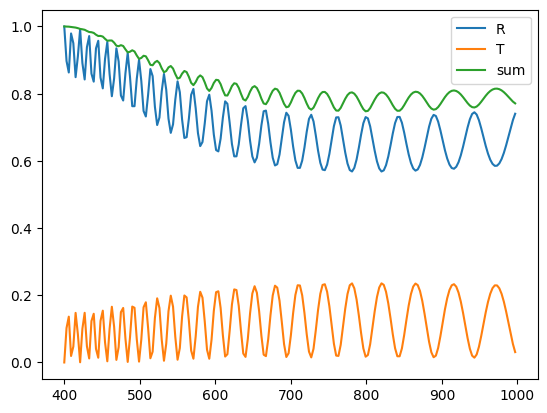

In [10]:
plt.plot(x,y1, label="R")
plt.plot(x,y2, label="T")
plt.plot(x,y3, label="sum")
plt.legend()